# CONTENTS

## 1.Checking Missing Values
## 2.Treatment of Outliers
## 3.Feature Generation
## 4.Data Analysis,Insights and Recommendations on Customer Segments

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
transaction = pd.read_excel('S:/Intern/4.Quantitum/QVI_transaction_data.xlsx')
purchase_behaviour = pd.read_csv('S:/Intern/4.Quantitum/QVI_purchase_behaviour.csv')

In [2]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


###  1.Checking Missing Values

In [4]:
print('Null values of purchase_behaviour data are \n\n' ,purchase_behaviour.isnull().sum())

Null values of purchase_behaviour data are 

 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [5]:
print('Null values of purchase_behaviour data are \n\n' ,transaction.isnull().sum())

Null values of purchase_behaviour data are 

 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


### 2.Treatment of Outliers

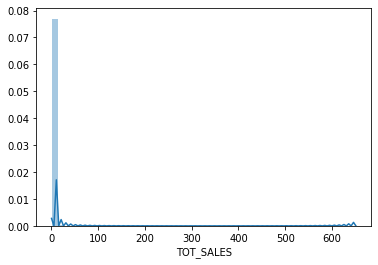

In [6]:
import seaborn as sns
sns.distplot(transaction.TOT_SALES)

In [7]:
#Outliers
IQR = transaction.TOT_SALES.quantile(0.75) - transaction.TOT_SALES.quantile(0.25)
Lower_fence = transaction.TOT_SALES.quantile(0.25) - (IQR * 3)
Upper_fence = transaction.TOT_SALES.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(20.599999999999994, -5.9999999999999964, 3.799999999999999)

In [8]:
transaction.drop(transaction[transaction['TOT_SALES']>30].index,inplace = True)

###  3.Feature Generation

In [9]:
print('Number of Unique Product Items are :',transaction.PROD_NAME.nunique())

Number of Unique Product Items are : 114


##### 3.1) Chips Brand Feature

In [10]:
transaction['brand'] = transaction.PROD_NAME.apply(lambda x : x.split()[0])
print('Number of Unique Brands are :',transaction.brand.nunique(),' \n\n',transaction['brand'].unique())

Number of Unique Brands are : 29  

 ['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'Woolworths' 'French'
 'RRD' 'Tostitos' 'Cheetos' 'Snbts' 'Sunbites']


##### 3.2) Weight of Chips Packets

In [11]:
transaction['weight'] = transaction.PROD_NAME.apply(lambda x : [i for i in list(x) if i.isdigit()])
transaction['weight'] = transaction.weight.apply(lambda x : int(''.join(x)))

##### 3.3)Time transformation

In [12]:
from datetime import datetime
datetime.fromordinal(693594)
offset = 693594
transaction['DATE'] = transaction['DATE']+offset
transaction['DATE'] = transaction['DATE'].apply(lambda x : datetime.fromordinal(x))

In [13]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,brand,weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


In [14]:
data = pd.merge(transaction,purchase_behaviour,on = 'LYLTY_CARD_NBR')

#  4.Data Analysis,Insights and Recommendations on Customer Segments

###  4.1) Customer Type vs Their LifeStage

In [15]:
customers = pd.crosstab(index = purchase_behaviour['LIFESTAGE'] , columns = purchase_behaviour['PREMIUM_CUSTOMER'])
customers.sort_values('Premium',ascending=False).head()

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
OLDER SINGLES/COUPLES,4929,4930,4750
RETIREES,4454,6479,3872
YOUNG SINGLES/COUPLES,3779,8088,2574
YOUNG FAMILIES,4017,2728,2433
MIDAGE SINGLES/COUPLES,1504,3340,2431


###  4.2) Volume of Transactions Over TIME

<Figure size 720x72 with 0 Axes>

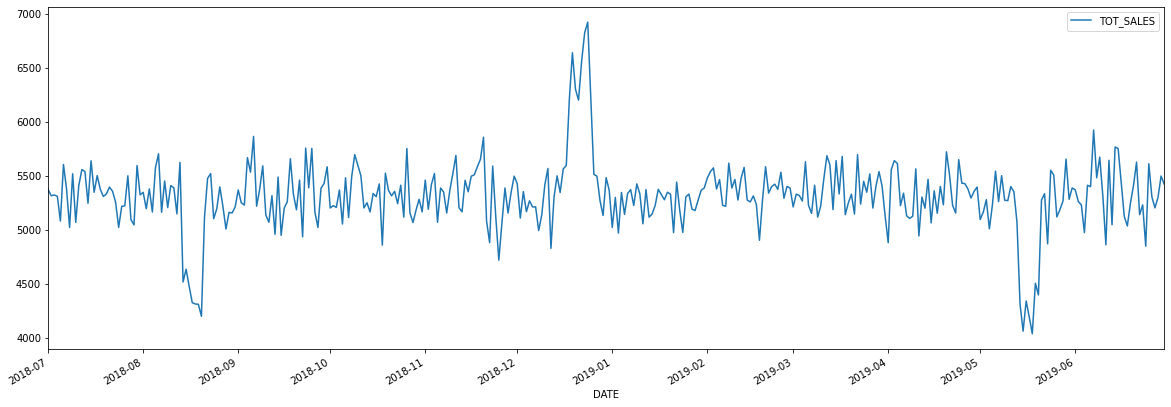

In [16]:
transaction.index = pd.to_datetime(transaction.DATE)
plt.figure(figsize=(10,1))
transaction[['TOT_SALES']].groupby([transaction.index]).sum().plot(figsize=(20,7))

INSIGHTS :

1.At the end of year the sales has gone at its PEAK in a year.May be Christmas Would be the reason and there a lot of chance to increase more sales. 

2.Theres downfall of Sales too between 5-6 and 8-9 months


RECOMMENDATIONS :

1.By Making a great display outside stores outlet window. Attracting more your customers with the decoration outside while keeping your interiors decorated too.

2.Appropiate Promotions and offers on old stock would help to increase sales


###  4.3) Most Saleable Chips Brands 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

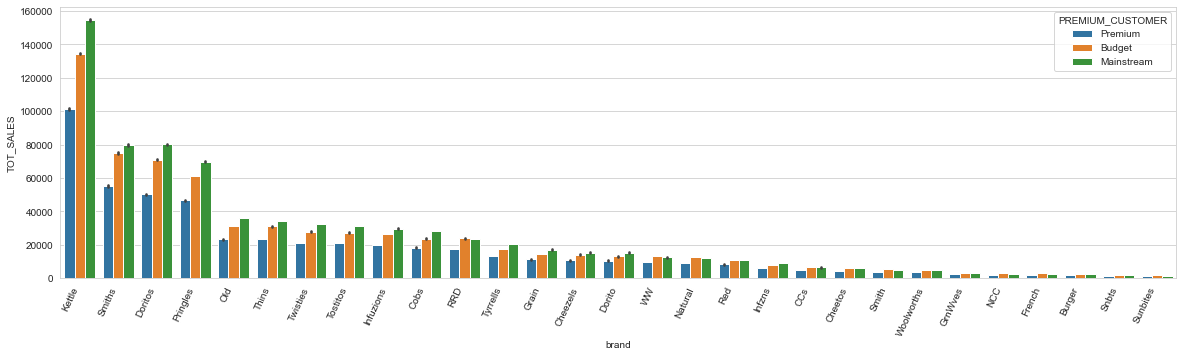

In [17]:
order = data.groupby(['brand']).sum()['TOT_SALES'].sort_values(ascending=False).index

plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
ax = sns.barplot(x = 'brand',y = 'TOT_SALES' ,data = data,hue = 'PREMIUM_CUSTOMER', estimator=sum,order = order)
plt.xticks(rotation=65, horizontalalignment='right')

INSIGHTS :

1.kettle Brand Outperformed all other brands with large margin.

2.Only 5-6 Brands have nearly 80% share in Total Sales 


RECOMMENDATIONS :

1.Offers on Bundle Pack of low saleable brand chips packets may result in good sales

2.Optimal Pricing of Best Brand Chips would yeild high Amount of sales

###  4.4) Total Sales of Different Customer Segments grouped by LIFE_STAGE

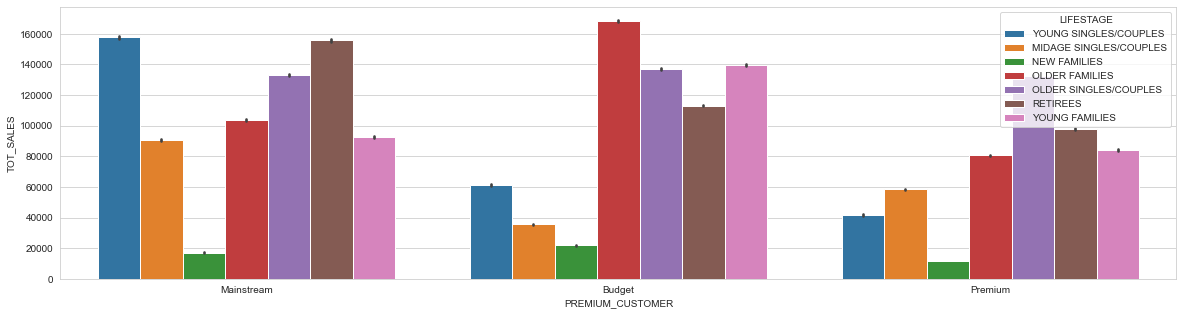

In [18]:
order = data.groupby(['PREMIUM_CUSTOMER']).sum()['TOT_SALES'].sort_values(ascending=False).index

plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax = sns.barplot(x = 'PREMIUM_CUSTOMER',y = 'TOT_SALES' ,data = data,hue = 'LIFESTAGE', estimator=sum,order = order)

INSIGHTS :

1.Premium Customer spends less than Other Customers which is unexpected.

2.Older Families and Retirees spend more money than New Famalies and Midage Singles.


RECOMMENDATIONS :

1.Older Families and Retirees prefers stores near to them,so opening new stores according to geographical location or re-locating low performed Stores near to Old and Retirees will defnitely yield more sales

2.Coupons to less aged customer segment or according to low performed customer segments from above plot will result them to come again and again

###  4.5)Top 10 and Bottom 10 Products of Total Sales

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

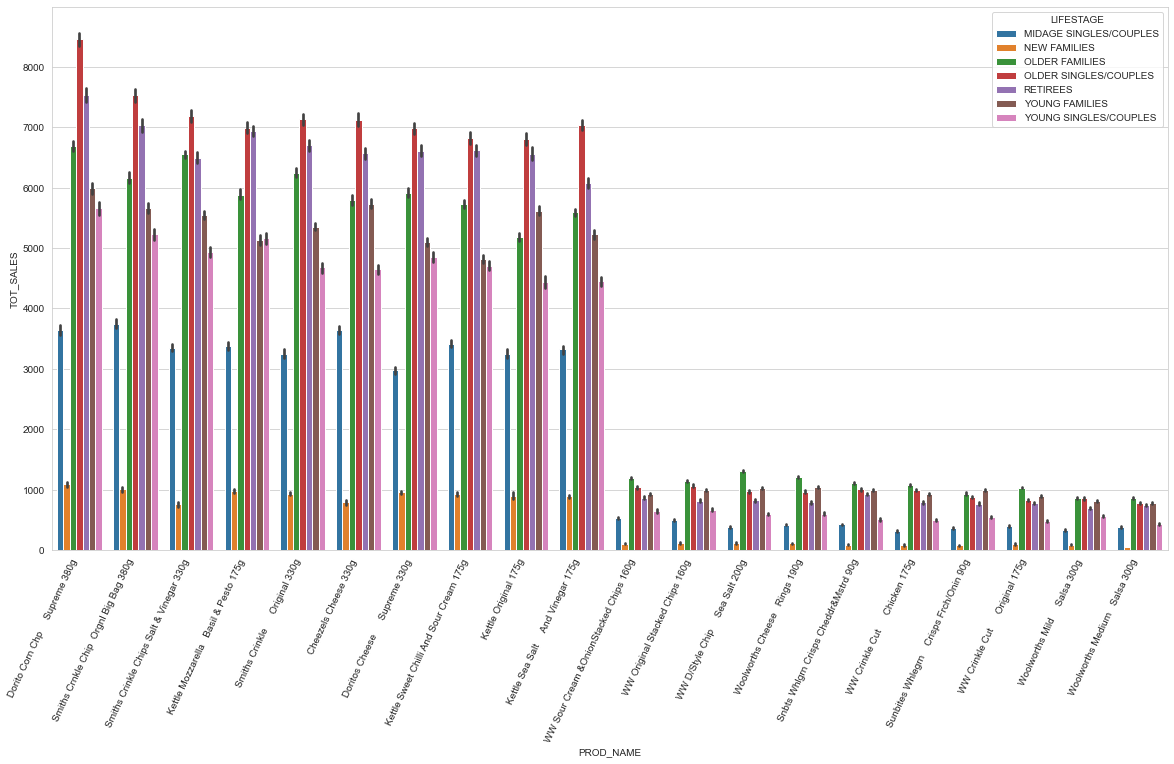

In [19]:
b=[]
for i in data.groupby(['PROD_NAME']).sum()['TOT_SALES'].sort_values(ascending=False).index[:10]:
    b.append(i)    

for i in data.groupby(['PROD_NAME']).sum()['TOT_SALES'].sort_values(ascending=False).index[-10:]:
    b.append(i)  
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.barplot(x = 'PROD_NAME',y = 'TOT_SALES' ,data = data[data['PROD_NAME'].isin(b)],hue = 'LIFESTAGE',
                                                         estimator = sum,order = b)
plt.xticks(rotation=65, horizontalalignment='right')

INSIGHTS :

1.Dorito corn chips,Smiths and Kettle brands are most valued and mostly brought by older singles/couples.

2.WW,Sunbites brands have very low sales.


RECOMMENDATIONS :

1.Its better to exclude all these top performing brands in Offers,promotions etc to gain more profits.

2.Having as much as low stock of poor performing products would be better.

###  4.6)Top 10 and Bottom 10 Stores of Total Sales

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

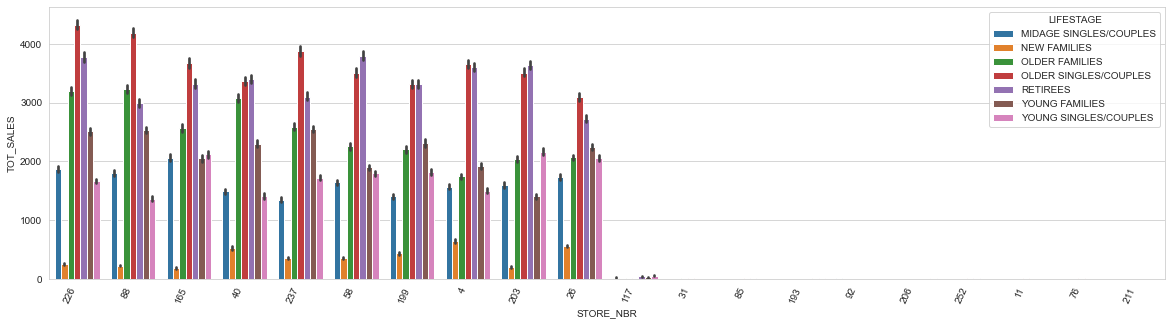

In [20]:
a=[]
for i in data.groupby(['STORE_NBR']).sum()['TOT_SALES'].sort_values(ascending=False).index[:10]:
    a.append(i)    

for i in data.groupby(['STORE_NBR']).sum()['TOT_SALES'].sort_values(ascending=False).index[-10:]:
    a.append(i)  
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
sns.barplot(x = 'STORE_NBR',y = 'TOT_SALES' ,data = data[data['STORE_NBR'].isin(a)],hue = 'LIFESTAGE',
                                                         estimator = sum,order = a)
plt.xticks(rotation=65, horizontalalignment='right')

INSIGHTS :

1.Many poor performing stores are there we need to find a way to deal with them.

2.LifeStage Segments are making same propotion almost for every store.


RECOMMENDATIONS :

1.Need to relocate the stores performing worst. 


### 4.7) Total Sales of Each Item vs Weight

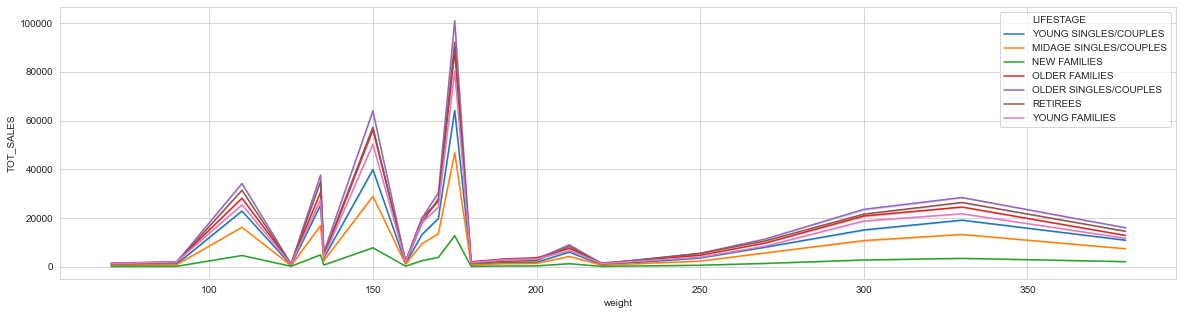

In [21]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
sns.lineplot(x = 'weight',y = 'TOT_SALES' ,data = data,hue = 'LIFESTAGE',estimator = sum)

INSIGHTS :

1.Average weighted chips packet have high sales compared to over weighted packets.

In [25]:
data.to_csv('S:/Intern/4.Quantitum/data.csv',index = False)